# Sales Forecasting of Different Products and Fake Order Detection Using Supervised Machine Learning

### Data Preprocessing, Cleaning, Wrangling, and Transformation

In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
# Load the dataset
df = pd.read_csv("D:\AA_Download\DataCoSupplyChainDataset_u.csv")

In [3]:
df # check rows and columns are okay

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,02/03/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [4]:
df.isna().sum() # check for Nan entries in the dataset

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [5]:
df["Product Description"].unique() # check the unique entries in the selected feature

array([nan])

In [6]:
# Drop the column "Product Description" because it is empty and reset the axis
df.drop("Product Description", axis=1, inplace=True)

In [7]:
df.isna().sum() # confirm the Product Description has been dropped

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [8]:
df["Order Zipcode"].unique() # view the unique entries of "Order Zipcode"

array([   nan, 99301., 90049., 94110., 66212., 77041., 85234., 95123.,
       93727., 85345., 45231., 47201., 19134., 60016., 60126., 98103.,
       94601., 10009., 28110., 80219., 90008., 77095., 32216., 77036.,
       74133., 94109., 92553., 20735., 60543., 60174., 31907., 62521.,
       92627., 28806., 35630.,  1852., 10024., 44312., 22153., 89015.,
       90045., 10011., 49505., 78664., 76017., 92105., 85705., 90032.,
       48227., 55407., 28205., 23602., 94122., 11572., 78207., 68104.,
       21215., 75081., 10035., 98115., 49201., 43229., 60653.,  6708.,
       98105., 19143., 42420., 80134., 94533., 92037., 90036., 22304.,
       35810., 19711., 38109., 72701., 23223., 40475., 65807., 33801.,
       13021., 45503., 78577., 11550., 40214., 67212., 76106., 21044.,
       30318., 79762., 60610., 75217., 90004., 89115., 95037., 97206.,
       14215., 79109., 33614., 75034., 28540., 32303.,  4240., 34952.,
       63116., 77070.,  1841., 97756., 19140., 28314., 13440., 60623.,
      

In [9]:
# Create value for Unknown Order Zipcode
unknown_order_zipcode = df["Order Zipcode"].median()
unknown_order_zipcode

59405.0

In [10]:
# Fill NaN values with the unknown_order_zipcode
df["Order Zipcode"].fillna(unknown_order_zipcode, inplace=True)

In [11]:
df.isna().sum() # validate changes

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

In [12]:
df["Customer Zipcode"].unique() # view unique entries under the "Customer Zipcode" column

array([  725., 95125., 90027., 14150., 33162., 94583., 11520., 93905.,
        1960.,   729., 90723., 60056., 90813., 95670., 59102., 18702.,
       48066., 90706., 60187., 48238., 75220., 17013., 75228., 19702.,
       91402., 30318., 94539., 14609., 75211.,   957.,   784.,   795.,
       20744., 93304., 11368., 45238., 20874., 75006., 77093., 90023.,
       96706.,  8701., 13440., 92083., 76106., 54935., 19139., 91764.,
       32765., 14221., 96822., 92056., 14120., 93611., 11434., 62040.,
        2155., 91766., 85281., 92703., 17402., 80010., 93065., 20904.,
       55124., 78201., 19143., 19149., 10466., 27858.,  7960., 92115.,
       93030., 33147., 87111., 79109., 33549., 97701.,  8816., 29720.,
       91762., 77015., 23666., 10016., 93257., 97223., 44136., 79927.,
       78840., 84010., 98031., 60620.,  2360., 11691., 77088., 19124.,
       48227., 92840., 92105., 60609., 92870., 95148., 44060., 95051.,
        7083., 90805., 92683., 33068., 91702., 33324.,  8540.,  8861.,
      

In [13]:
# Create value for Unknown Customer Zipcode
unknown_customer_zipcode = 9900
unknown_customer_zipcode

9900

In [14]:
# Fill NaN values with the unknown_customer_zipcode
df["Customer Zipcode"].fillna(unknown_customer_zipcode, inplace=True)

In [15]:
df.isna().sum() # validate changes made

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

In [16]:
df["Customer Lname"].unique() # view the unique entries of "Customer Lname"

array(['Holloway', 'Luna', 'Maldonado', ..., 'Kiney', 'Delan', 'Harri'],
      dtype=object)

In [17]:
# Fill NaN values with the unknown_customer_lname
unknown_customer_lname = "Unknown"
df["Customer Lname"].fillna(unknown_customer_lname, inplace=True)

In [18]:
df.isna().sum() # validating changes made

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

In [19]:
df.info() # checking the dataframe type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

# Exploratory Data Analysis (EDA)

<Figure size 768x576 with 0 Axes>

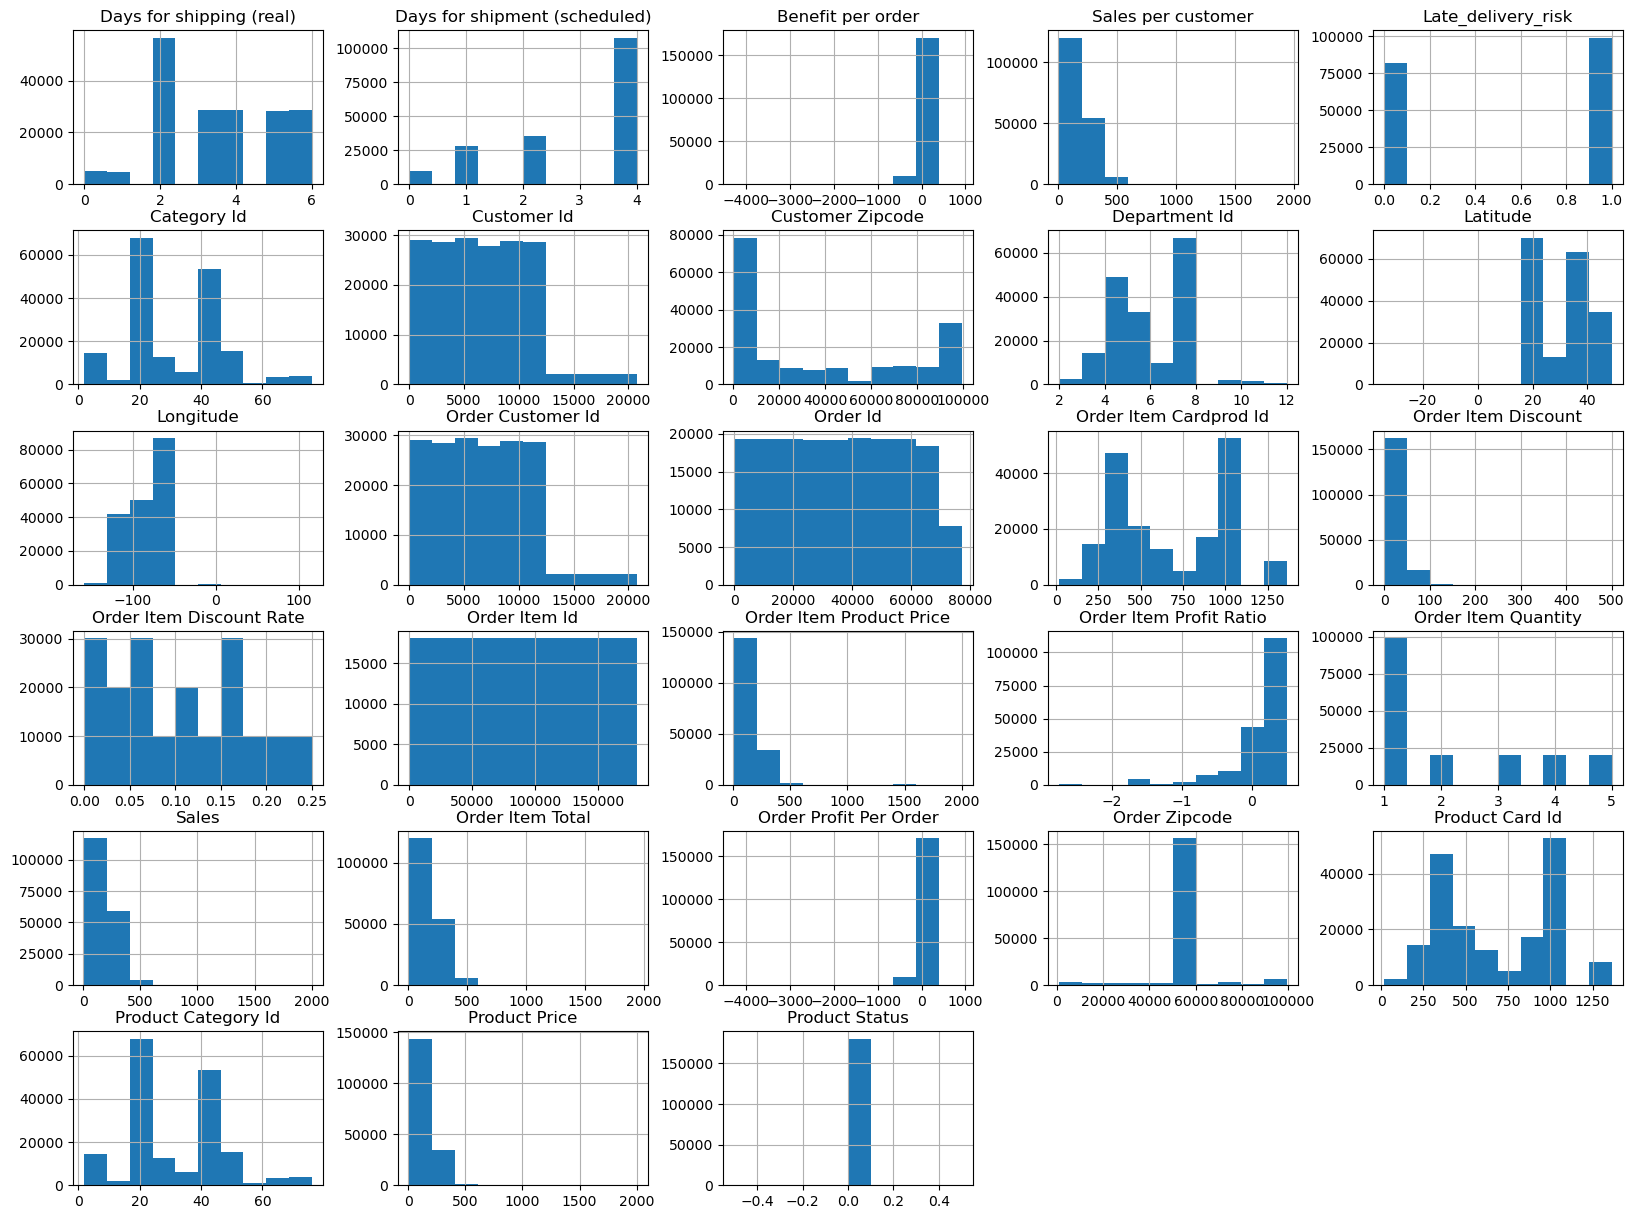

In [20]:
# Visualization of the dataset for a brief insight

plt.figure(dpi=120)
df.hist(figsize=(20,15))
plt.show()

In [21]:
df.columns # viewing the columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product Im

<Axes: xlabel='Longitude', ylabel='Latitude'>

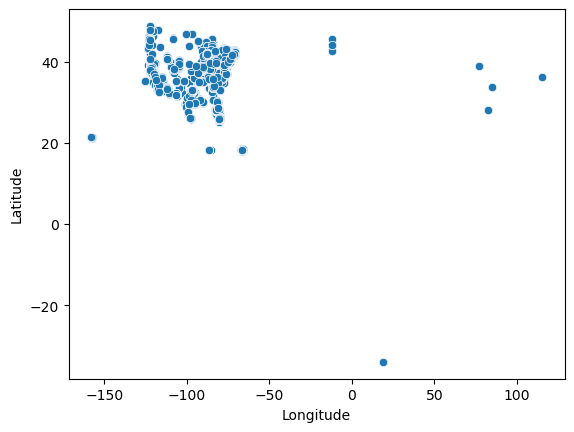

In [22]:
sns.scatterplot(df, x = df["Longitude"], y =df["Latitude"]) # cordinates scartter plot indicating location of orders/sales

### Identifying Potential Outliers with Inter Quartile Rage (IQR) in Longitude & Latitude

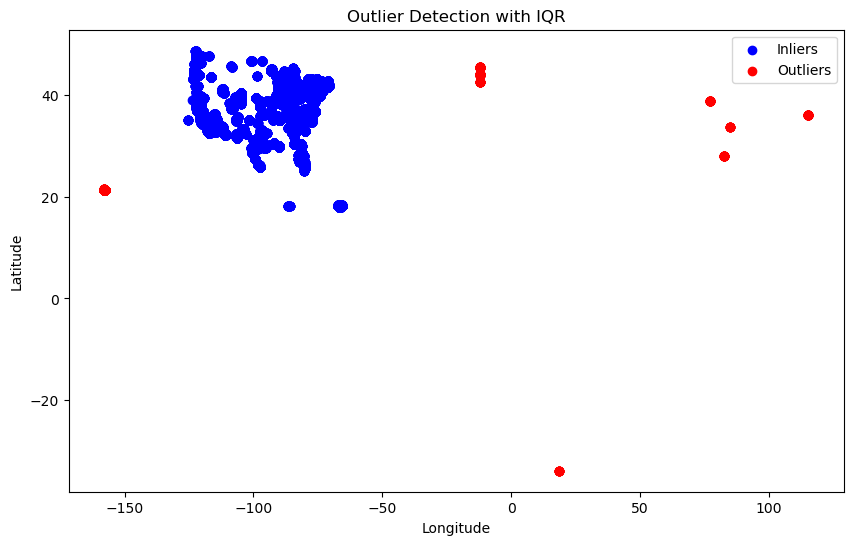

In [23]:
# Calculate the IQR
Q1 = df[['Longitude', 'Latitude']].quantile(0.25)
Q3 = df[['Longitude', 'Latitude']].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[['Longitude', 'Latitude']] < lower_bound) | (df[['Longitude', 'Latitude']] > upper_bound)).any(axis=1)

# Add outlier labels to DataFrame
df['Outlier'] = outliers.astype(int)

# Filter out outliers
outlier_indices = np.where(outliers)[0]
inlier_indices = np.where(~outliers)[0]

# Plot the data points with outliers and inliers
plt.figure(figsize=(10, 6))
plt.scatter(df.loc[inlier_indices, 'Longitude'], df.loc[inlier_indices, 'Latitude'], c='blue', label='Inliers')
plt.scatter(df.loc[outlier_indices, 'Longitude'], df.loc[outlier_indices, 'Latitude'], c='red', label='Outliers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Outlier Detection with IQR')
plt.legend()
plt.show()


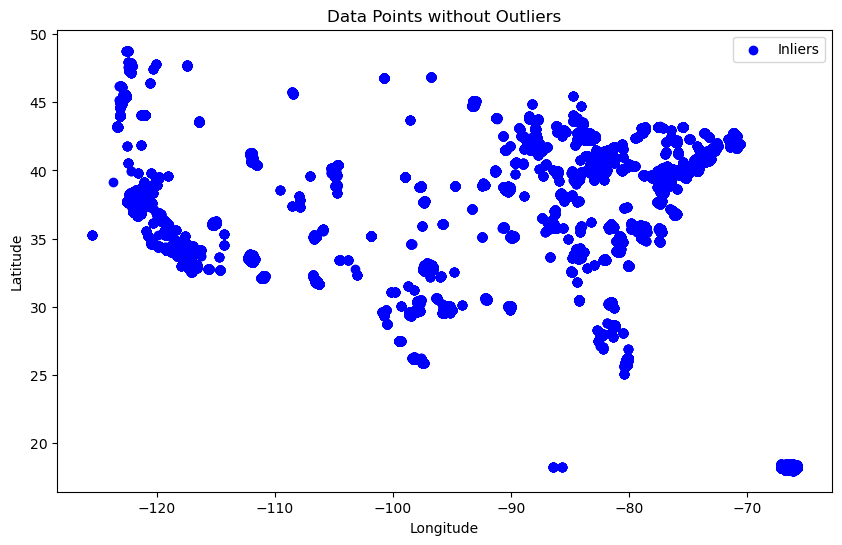

In [24]:
# Filter out outliers
df_filtered = df[~outliers]

# Plot the data points without outliers
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Longitude'], df_filtered['Latitude'], c='blue', label='Inliers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Data Points without Outliers')
plt.legend()
plt.show()


In [25]:
df = df_filtered # reassigning the dataframe

In [26]:
# Drop the "Outlier" column from the DataFrame
df.drop("Outlier", axis=1, inplace=True)

In [27]:
df.shape # Verify the shape of the cleaned DataFrame

(179105, 52)

In [28]:
df.info() # Verify the data type of the cleaned DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 179105 entries, 0 to 180518
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           179105 non-null  object 
 1   Days for shipping (real)       179105 non-null  int64  
 2   Days for shipment (scheduled)  179105 non-null  int64  
 3   Benefit per order              179105 non-null  float64
 4   Sales per customer             179105 non-null  float64
 5   Delivery Status                179105 non-null  object 
 6   Late_delivery_risk             179105 non-null  int64  
 7   Category Id                    179105 non-null  int64  
 8   Category Name                  179105 non-null  object 
 9   Customer City                  179105 non-null  object 
 10  Customer Country               179105 non-null  object 
 11  Customer Email                 179105 non-null  object 
 12  Customer Fname                 1791

In [29]:
df["Product Status"].unique() # checking unique entries in Product Status

array([0], dtype=int64)

In [30]:
# Drop the "Product Status" column from the DataFrame
df.drop("Product Status", axis=1, inplace=True)

In [31]:
df["Customer Email"].unique() # checking unique entries in Customer Email

array(['XXXXXXXXX'], dtype=object)

In [32]:
# Drop the "Customer Email" column from the DataFrame
df.drop("Customer Email", axis=1, inplace=True)

In [33]:
df["Customer Password"].unique() # checking unique entries in Customer Password

array(['XXXXXXXXX'], dtype=object)

In [34]:
# Drop the "Customer Password" column from the DataFrame
df.drop("Customer Password", axis=1, inplace=True)

In [35]:
df.info() # checking current data type

<class 'pandas.core.frame.DataFrame'>
Index: 179105 entries, 0 to 180518
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           179105 non-null  object 
 1   Days for shipping (real)       179105 non-null  int64  
 2   Days for shipment (scheduled)  179105 non-null  int64  
 3   Benefit per order              179105 non-null  float64
 4   Sales per customer             179105 non-null  float64
 5   Delivery Status                179105 non-null  object 
 6   Late_delivery_risk             179105 non-null  int64  
 7   Category Id                    179105 non-null  int64  
 8   Category Name                  179105 non-null  object 
 9   Customer City                  179105 non-null  object 
 10  Customer Country               179105 non-null  object 
 11  Customer Fname                 179105 non-null  object 
 12  Customer Id                    1791

In [36]:
df.duplicated().sum() # checking for duplicated entries

0

## Feature Engineering

In [37]:
df_num = df.select_dtypes(exclude = "object") # creating a numerical features in preparation for regression

In [38]:
df_num # viewing the contents of df_num in rows and columns

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Price
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,...,327.750000,0.29,1,327.750000,314.640015,91.250000,59405.0,1360,73,327.750000
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,...,327.750000,-0.80,1,327.750000,311.359985,-249.089996,59405.0,1360,73,327.750000
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,37.292233,...,327.750000,-0.80,1,327.750000,309.720001,-247.779999,59405.0,1360,73,327.750000
3,3,4,22.860001,304.809998,0,73,19490,90027.0,2,34.125946,...,327.750000,0.08,1,327.750000,304.809998,22.860001,59405.0,1360,73,327.750000
4,2,4,134.210007,298.250000,0,73,19489,725.0,2,18.253769,...,327.750000,0.45,1,327.750000,298.250000,134.210007,59405.0,1360,73,327.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,40.000000,399.980011,0,45,1005,11207.0,7,40.640930,...,399.980011,0.10,1,399.980011,399.980011,40.000000,59405.0,1004,45,399.980011
180515,3,2,-613.770019,395.980011,1,45,9141,93304.0,7,35.362545,...,399.980011,-1.55,1,399.980011,395.980011,-613.770019,59405.0,1004,45,399.980011
180516,5,4,141.110001,391.980011,1,45,291,6010.0,7,41.629959,...,399.980011,0.36,1,399.980011,391.980011,141.110001,59405.0,1004,45,399.980011
180517,3,4,186.229996,387.980011,0,45,2813,725.0,7,18.213350,...,399.980011,0.48,1,399.980011,387.980011,186.229996,59405.0,1004,45,399.980011


In [39]:
df_num.describe() # describing the dataframe

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Price
count,179105.000000,179105.000000,179105.000000,179105.000000,179105.000000,179105.000000,179105.000000,179105.000000,179105.000000,179105.000000,...,179105.000000,179105.000000,179105.000000,179105.000000,179105.000000,179105.000000,179105.000000,179105.000000,179105.000000,179105.000000
mean,3.497602,2.931241,21.945363,183.093128,0.548326,31.851026,6696.497658,35466.487507,5.443371,29.765869,...,141.217642,0.120443,2.127685,203.760175,183.093128,21.945363,58851.519248,692.497781,31.851026,141.217642
std,1.624280,1.374861,104.445450,120.070654,0.497660,15.642484,4159.947120,37316.671179,1.629302,9.809661,...,139.772847,0.466871,1.453459,132.318081,120.070654,104.445450,11923.688905,336.489249,15.642484,139.772847
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,17.982491,...,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,9.990000
25%,2.000000,2.000000,6.970000,104.379997,0.000000,18.000000,3263.000000,725.000000,4.000000,18.264778,...,50.000000,0.080000,1.000000,119.980003,104.379997,6.970000,59405.000000,403.000000,18.000000,50.000000
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6460.000000,19139.000000,5.000000,33.218380,...,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,59.990002
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9777.000000,77478.000000,7.000000,39.288494,...,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,59405.000000,1004.000000,45.000000,199.990005
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,1999.989990


In [40]:
df_num.corr() # checking correlated features

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Price
Days for shipping (real),1.000000,0.516469,-0.005460,0.001659,0.401311,-0.000493,0.003637,0.000292,-0.001622,-0.003955,...,0.001976,-0.005035,-0.000463,0.001917,0.001659,-0.005460,-0.000383,-0.001025,-0.000493,0.001976
Days for shipment (scheduled),0.516469,1.000000,-0.000259,0.006448,-0.369001,-0.000276,0.001504,-0.003790,0.000020,-0.004552,...,0.006847,-0.001986,-0.002695,0.006306,0.006448,-0.000259,0.002279,-0.000351,-0.000276,0.006847
Benefit per order,-0.005460,-0.000259,1.000000,0.133398,-0.004096,0.031720,0.009160,0.001880,0.031422,0.000529,...,0.103735,0.823426,0.015223,0.131751,0.133398,1.000000,-0.001833,0.033027,0.031720,0.103735
Sales per customer,0.001659,0.006448,0.133398,1.000000,-0.004200,0.225197,0.060277,-0.001537,0.232586,-0.000042,...,0.781921,-0.001271,0.105453,0.989744,1.000000,0.133398,0.002500,0.236369,0.225197,0.781921
Late_delivery_risk,0.401311,-0.369001,-0.004096,-0.004200,1.000000,0.001509,0.001415,0.003581,0.000850,0.000384,...,-0.002600,-0.002641,-0.000075,-0.003936,-0.004200,-0.004096,-0.005162,0.001230,0.001509,-0.002600
Category Id,-0.000493,-0.000276,0.031720,0.225197,0.001509,1.000000,0.274741,0.002773,0.888967,0.002496,...,0.460928,-0.001779,-0.302345,0.227452,0.225197,0.031720,0.003386,0.991097,1.000000,0.460928
Customer Id,0.003637,0.001504,0.009160,0.060277,0.001415,0.274741,1.000000,0.003045,0.137056,0.004649,...,0.111256,-0.000505,-0.091444,0.061035,0.060277,0.009160,0.003254,0.228095,0.274741,0.111256
Customer Zipcode,0.000292,-0.003790,0.001880,-0.001537,0.003581,0.002773,0.003045,1.000000,0.002765,0.600853,...,0.002011,0.002777,-0.006180,-0.001675,-0.001537,0.001880,0.003040,0.003052,0.002773,0.002011
Department Id,-0.001622,0.000020,0.031422,0.232586,0.000850,0.888967,0.137056,0.002765,1.000000,0.002685,...,0.446843,-0.003122,-0.265383,0.234910,0.232586,0.031422,0.000884,0.906251,0.888967,0.446843
Latitude,-0.003955,-0.004552,0.000529,-0.000042,0.000384,0.002496,0.004649,0.600853,0.002685,1.000000,...,0.000572,0.000206,-0.001776,-0.000531,-0.000042,0.000529,-0.001676,0.002309,0.002496,0.000572


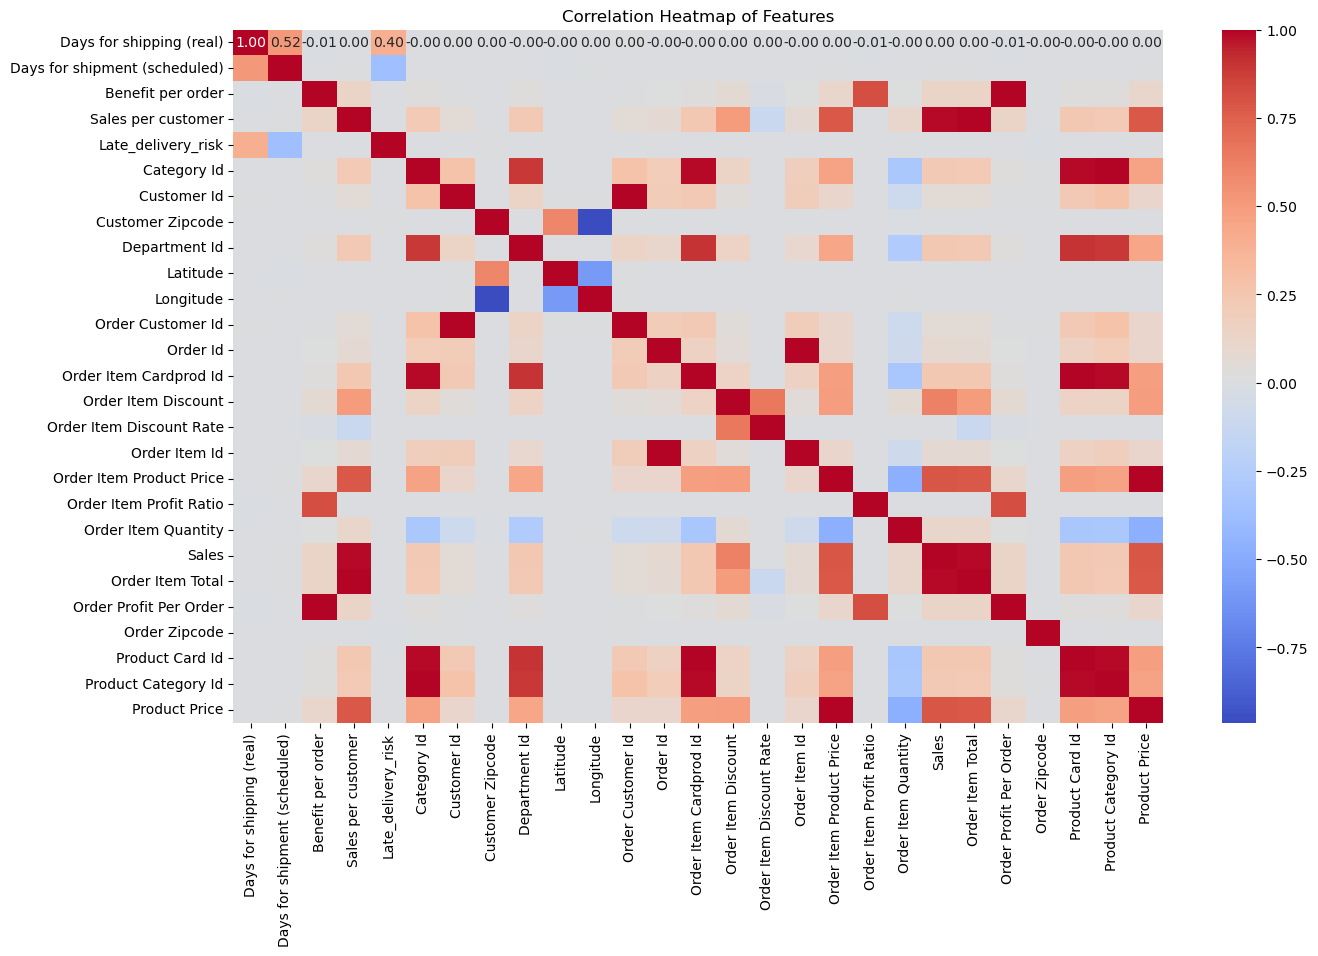

In [41]:
# Calculate correlation matrix
corr_matrix = df_num.corr()

# Create heatmap
plt.figure(figsize=(15, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [42]:
# showing correlation of dependant variables to sales
correlation_matrix = df_num.corr()
correlation_matrix["Sales"].sort_values(ascending = False)

Sales                            1.000000
Sales per customer               0.989744
Order Item Total                 0.989744
Product Price                    0.790096
Order Item Product Price         0.790096
Order Item Discount              0.617871
Product Card Id                  0.238767
Order Item Cardprod Id           0.238767
Department Id                    0.234910
Product Category Id              0.227452
Category Id                      0.227452
Order Profit Per Order           0.131751
Benefit per order                0.131751
Order Item Quantity              0.106460
Order Id                         0.079909
Order Item Id                    0.079073
Customer Id                      0.061035
Order Customer Id                0.061035
Days for shipment (scheduled)    0.006306
Order Zipcode                    0.002744
Longitude                        0.002341
Days for shipping (real)         0.001917
Order Item Discount Rate         0.000612
Latitude                        -0

<Axes: >

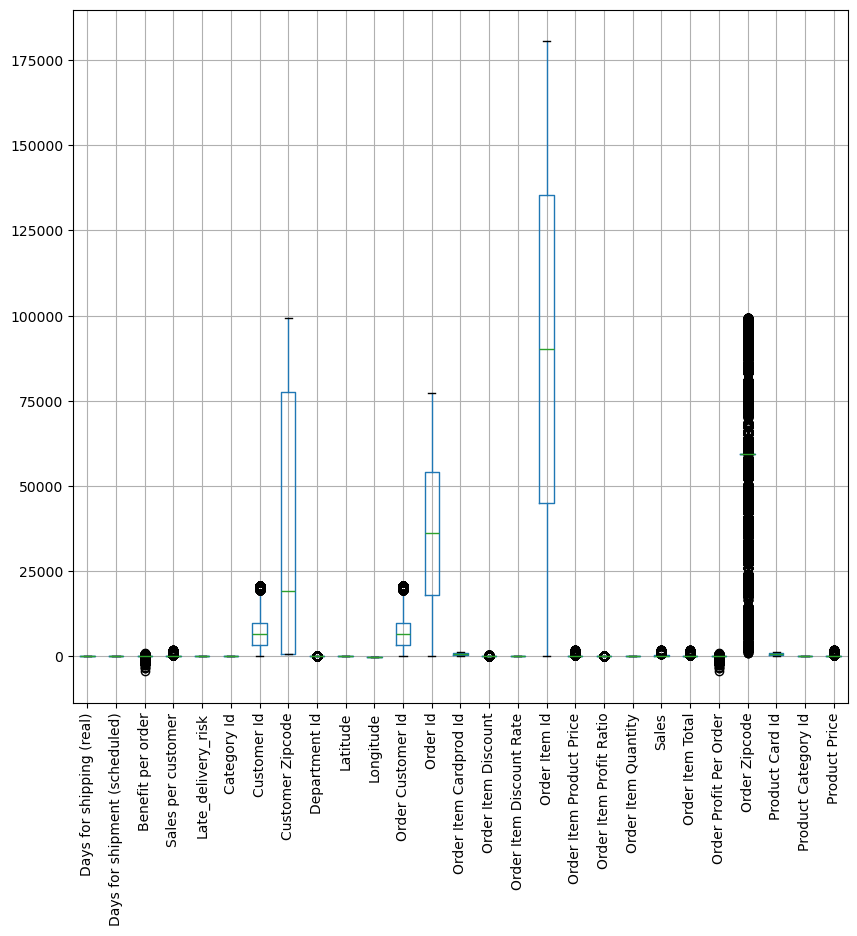

In [43]:
df_num.boxplot(figsize=(10, 9), rot = 90) # showing the count of each numerical entry

### Visualizations based on top 5 correlations with Sales

<Axes: xlabel='Sales', ylabel='Order Item Total'>

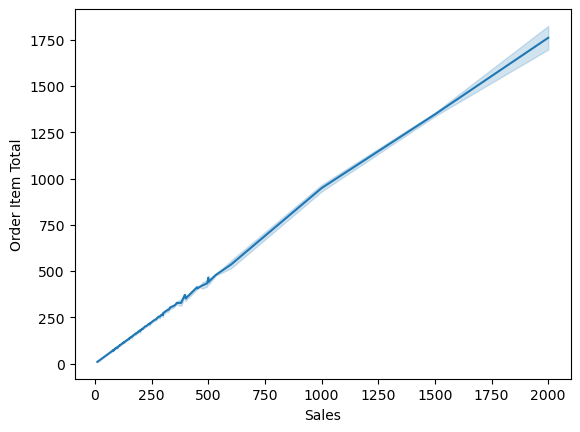

In [44]:
sns.lineplot(x = df_num["Sales"], y = df_num["Order Item Total"]) # Sales vs Order Otem Total

<Axes: xlabel='Sales', ylabel='Sales per customer'>

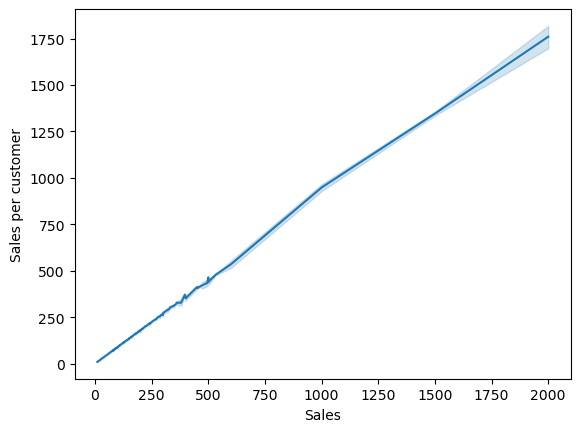

In [45]:
sns.lineplot(y = df_num["Sales per customer"], x = df_num["Sales"]) #Sales vs Sales per customer

<Axes: xlabel='Sales', ylabel='Order Item Product Price'>

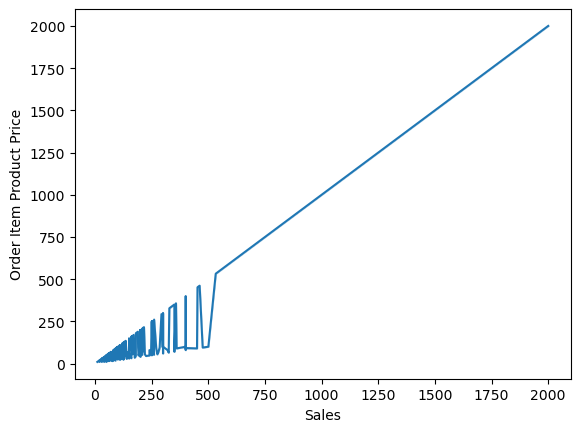

In [46]:
sns.lineplot(y = df_num["Order Item Product Price"], x = df_num["Sales"]) # Sales vs Order Item Product Price

<Axes: xlabel='Sales', ylabel='Product Price'>

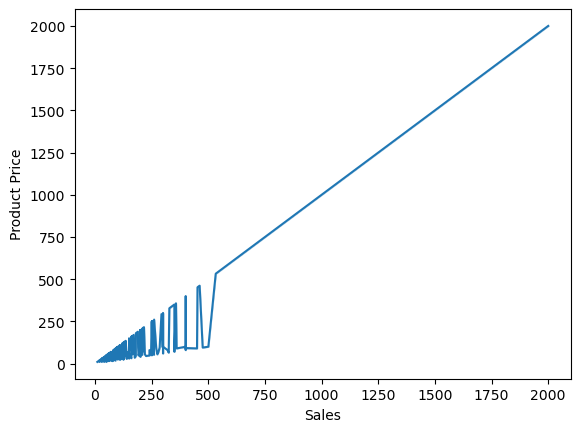

In [47]:
sns.lineplot(y = df_num["Product Price"], x = df_num["Sales"]) # Sales vs Product Price

<Axes: xlabel='Sales', ylabel='Order Item Discount'>

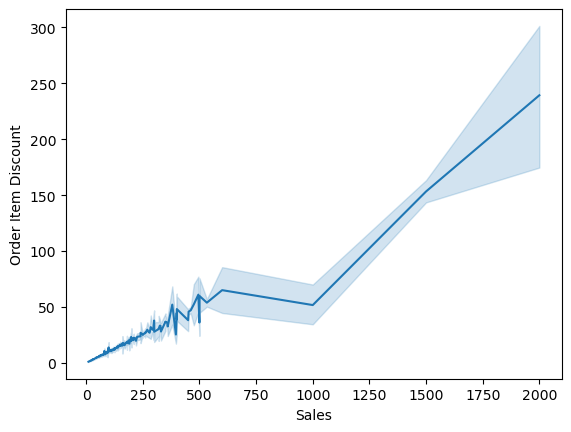

In [48]:
sns.lineplot(y = df_num["Order Item Discount"], x = df_num["Sales"]) # Sales vs Order Item Discount

In [49]:
# Reducing dimensionality by dropping similar features required for forecasting sales
columns_to_drop = [
    "Order Item Total",
    "Order Item Product Price",
    "Order Item Cardprod Id",
    "Category Id",
    "Benefit per order"
]

df_num.drop(columns=columns_to_drop, axis=1, inplace=True)

In [50]:
# Features selected and used for forecasting sales
correlation_matrix = df_num.corr()
correlation_matrix["Sales"].sort_values(ascending = False)

Sales                            1.000000
Sales per customer               0.989744
Product Price                    0.790096
Order Item Discount              0.617871
Product Card Id                  0.238767
Department Id                    0.234910
Product Category Id              0.227452
Order Profit Per Order           0.131751
Order Item Quantity              0.106460
Order Id                         0.079909
Order Item Id                    0.079073
Customer Id                      0.061035
Order Customer Id                0.061035
Days for shipment (scheduled)    0.006306
Order Zipcode                    0.002744
Longitude                        0.002341
Days for shipping (real)         0.001917
Order Item Discount Rate         0.000612
Latitude                        -0.000531
Order Item Profit Ratio         -0.001591
Customer Zipcode                -0.001675
Late_delivery_risk              -0.003936
Name: Sales, dtype: float64

In [51]:
df_num.info() # checking dataframe dtype for each feature

<class 'pandas.core.frame.DataFrame'>
Index: 179105 entries, 0 to 180518
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       179105 non-null  int64  
 1   Days for shipment (scheduled)  179105 non-null  int64  
 2   Sales per customer             179105 non-null  float64
 3   Late_delivery_risk             179105 non-null  int64  
 4   Customer Id                    179105 non-null  int64  
 5   Customer Zipcode               179105 non-null  float64
 6   Department Id                  179105 non-null  int64  
 7   Latitude                       179105 non-null  float64
 8   Longitude                      179105 non-null  float64
 9   Order Customer Id              179105 non-null  int64  
 10  Order Id                       179105 non-null  int64  
 11  Order Item Discount            179105 non-null  float64
 12  Order Item Discount Rate       1791

# DIAGNOSTIC ANALYTICS - REGRESSION

## Sales Forecasting with Random Forest Regressor

In [52]:
# importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Split data into features (X) and target (y)
X = df_num.drop(["Sales"], axis = 1)
y = df_num["Sales"] # Target to be predicted

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Make Prediction
y_pred_rf_reg = rf_reg.predict(X_test)

In [53]:
# Test and calculate the evaluation metrics

# importing the required libraries
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# print metrics
print("Random Forest Regression MSE:", mean_squared_error(y_test, y_pred_rf_reg))
print("Random Forest Regression RMSE:", mean_squared_error(y_test, y_pred_rf_reg, squared=False))
print("Random Forest Regression MAE:", mean_absolute_error(y_test, y_pred_rf_reg))
print("Random Forest Regression R2:", r2_score(y_test, y_pred_rf_reg))


Random Forest Regression MSE: 0.4050580810517147
Random Forest Regression RMSE: 0.6364417342158784
Random Forest Regression MAE: 0.018135668988730636
Random Forest Regression R2: 0.9999764959630911


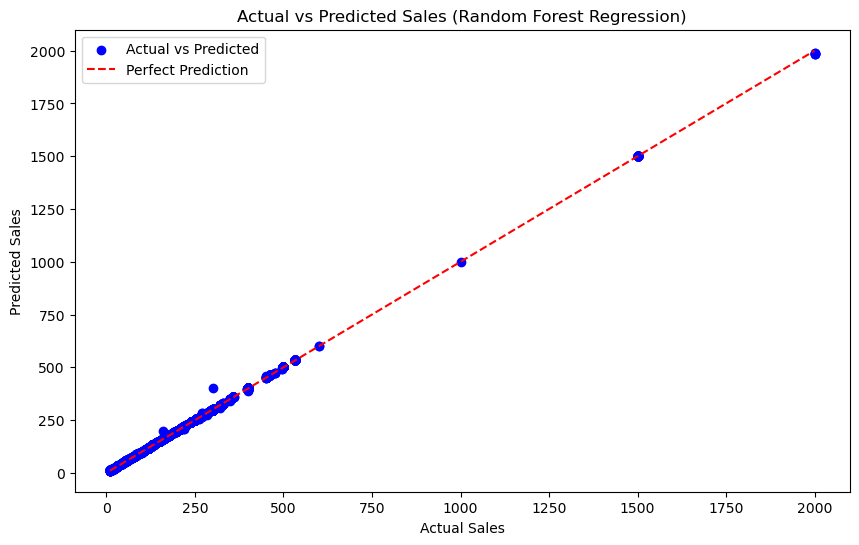

In [54]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf_reg, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Random Forest Regression)')
plt.legend()
plt.show()

## Sales Forecasting with Linear Regression

In [55]:
# Linear Regression Model

# Initialize and Train Linear Regressor
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make Prediction
y_pred_linear = linear_reg.predict(X_test)

In [56]:
# Test and calculate the evaluation metrics

print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_linear))
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_linear, squared=False))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_linear))
print("Linear Regression R2:", r2_score(y_test, y_pred_linear))


Linear Regression MSE: 2.2292746589972616e-06
Linear Regression RMSE: 0.0014930755704241033
Linear Regression MAE: 0.0005708372921377173
Linear Regression R2: 0.9999999998706434


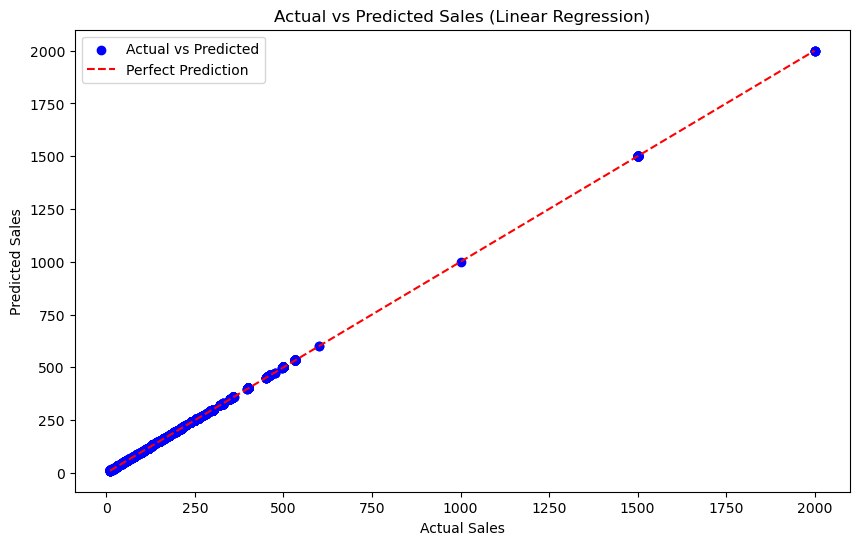

In [57]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Linear Regression)')
plt.legend()
plt.show()

# PREDICTIVE ANALYTICS - CLASSIFICATION

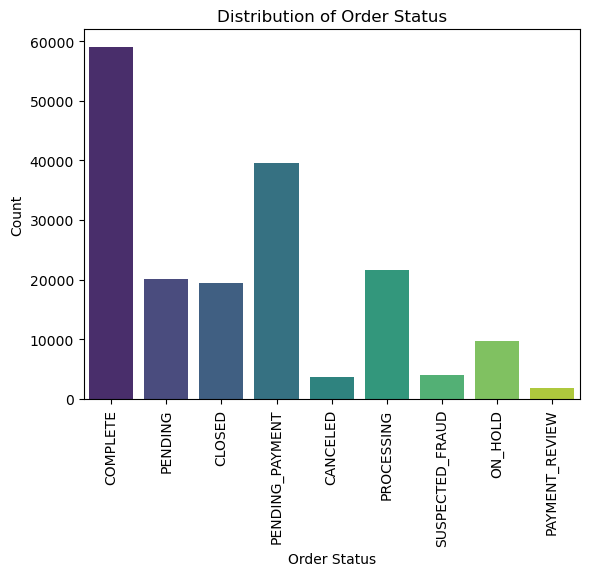

In [58]:
# Using count plot to check the distribution of class labels in 'Order Status'

sns.countplot(x="Order Status", data=df, palette="viridis")
plt.title("Distribution of Order Status")
plt.xlabel("Order Status")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


## Label Encoding Categorical Features

In [59]:
# Import the required library
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Define the target column that should not be encoded
target_column = "Order Status"

# Iterate through each column in the DataFrame that is of type 'object', excluding the target column
for column in df.select_dtypes(include=['object']).columns:
    if column != target_column:
        # Apply label encoding to each categorical column except the target column
        df[column] = label_encoder.fit_transform(df[column])

# Display the DataFrame after label encoding
print(df.head())

   Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     1                         3                              4   
1     3                         5                              4   
2     0                         4                              4   
3     1                         3                              4   
4     2                         2                              4   

   Benefit per order  Sales per customer  Delivery Status  Late_delivery_risk  \
0          91.250000          314.640015                0                   0   
1        -249.089996          311.359985                1                   1   
2        -247.779999          309.720001                3                   0   
3          22.860001          304.809998                0                   0   
4         134.210007          298.250000                0                   0   

   Category Id  Category Name  Customer City  ...  Order State  \
0           73             40         

In [60]:
# # import the required library
# from sklearn.preprocessing import LabelEncoder

# # Create a LabelEncoder object
# label_encoder = LabelEncoder()

# # Iterate through each column in df
# for column in df.select_dtypes(include=['object']).columns:
#     # Apply label encoding to each categorical column
#     df[column] = label_encoder.fit_transform(df[column])

# # Display the DataFrame after label encoding
# print(df.head())


## Class Label Balancing

In [61]:
# Check if the taregt (Order Status) class labels are balanced
class_counts = df['Order Status'].value_counts()

# Print class counts
print("Class counts:")
print(class_counts)


Class counts:
Order Status
COMPLETE           59006
PENDING_PAYMENT    39557
PROCESSING         21722
PENDING            20067
CLOSED             19475
ON_HOLD             9715
SUSPECTED_FRAUD     4022
CANCELED            3659
PAYMENT_REVIEW      1882
Name: count, dtype: int64


In [62]:
# Calculate class distribution
class_distribution = df['Order Status'].value_counts(normalize=True)

# Print class distribution
print("Class distribution:")
print(class_distribution)


Class distribution:
Order Status
COMPLETE           0.329449
PENDING_PAYMENT    0.220859
PROCESSING         0.121281
PENDING            0.112040
CLOSED             0.108735
ON_HOLD            0.054242
SUSPECTED_FRAUD    0.022456
CANCELED           0.020429
PAYMENT_REVIEW     0.010508
Name: proportion, dtype: float64


In [63]:
# importing the required library to balance the class labels of Order Status (y)
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = df.drop("Order Status", axis=1)
y = df["Order Status"]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["Order Status"] = y_resampled

# Display class distribution after SMOTE
print("Class distribution after SMOTE:")
print(df_resampled["Order Status"].value_counts())

# Display the first few rows of the resampled DataFrame
print(df_resampled.head())

Class distribution after SMOTE:
Order Status
COMPLETE           59006
PENDING            59006
CLOSED             59006
PENDING_PAYMENT    59006
CANCELED           59006
PROCESSING         59006
SUSPECTED_FRAUD    59006
ON_HOLD            59006
PAYMENT_REVIEW     59006
Name: count, dtype: int64
   Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     1                         3                              4   
1     3                         5                              4   
2     0                         4                              4   
3     1                         3                              4   
4     2                         2                              4   

   Benefit per order  Sales per customer  Delivery Status  Late_delivery_risk  \
0          91.250000          314.640015                0                   0   
1        -249.089996          311.359985                1                   1   
2        -247.779999          309.720001            

## Fake Order Detection with Random Forest Classifier

In [64]:
# importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data into features (X) and target (y)
X = df_resampled.drop("Order Status", axis=1)
y = df_resampled["Order Status"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred))

Classification Report for Random Forest:
                 precision    recall  f1-score   support

       CANCELED       0.97      1.00      0.99     11792
         CLOSED       1.00      1.00      1.00     11690
       COMPLETE       0.87      1.00      0.93     11967
        ON_HOLD       1.00      0.85      0.92     11794
 PAYMENT_REVIEW       0.98      0.98      0.98     11765
        PENDING       0.91      0.88      0.90     11825
PENDING_PAYMENT       0.98      0.98      0.98     11758
     PROCESSING       0.91      0.88      0.89     11744
SUSPECTED_FRAUD       0.97      1.00      0.98     11876

       accuracy                           0.95    106211
      macro avg       0.95      0.95      0.95    106211
   weighted avg       0.95      0.95      0.95    106211



<Figure size 2000x3000 with 0 Axes>

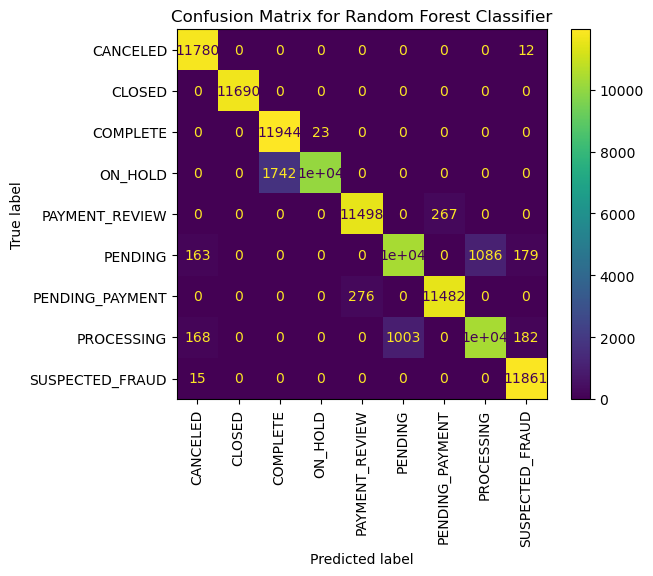

In [65]:
# importing the required library to display confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# # Define class labels
# class_labels = ['COMPLETE', 'PENDING_PAYMENT', 'PROCESSING', 'PENDING', 
#                 'CLOSED', 'ON_HOLD', 'SUSPECTED_FRAUD', 'CANCELED', 'PAYMENT_REVIEW']

# Plot confusion matrix
plt.figure(dpi=200, figsize=(10, 15))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xticks(rotation=90)
plt.show()

## Fake Order Detection with Logistic Regression Classifier

In [66]:
# importing the required library
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_lr = lr_classifier.predict(X_test_scaled)

# Evaluate the model
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


Classification Report for Logistic Regression:
                 precision    recall  f1-score   support

       CANCELED       0.46      0.54      0.50     11792
         CLOSED       1.00      1.00      1.00     11690
       COMPLETE       0.68      0.72      0.70     11967
        ON_HOLD       0.70      0.66      0.68     11794
 PAYMENT_REVIEW       0.66      0.64      0.65     11765
        PENDING       0.52      0.43      0.47     11825
PENDING_PAYMENT       0.65      0.68      0.66     11758
     PROCESSING       0.51      0.40      0.45     11744
SUSPECTED_FRAUD       0.47      0.58      0.52     11876

       accuracy                           0.63    106211
      macro avg       0.63      0.63      0.62    106211
   weighted avg       0.63      0.63      0.62    106211



<Figure size 2000x3000 with 0 Axes>

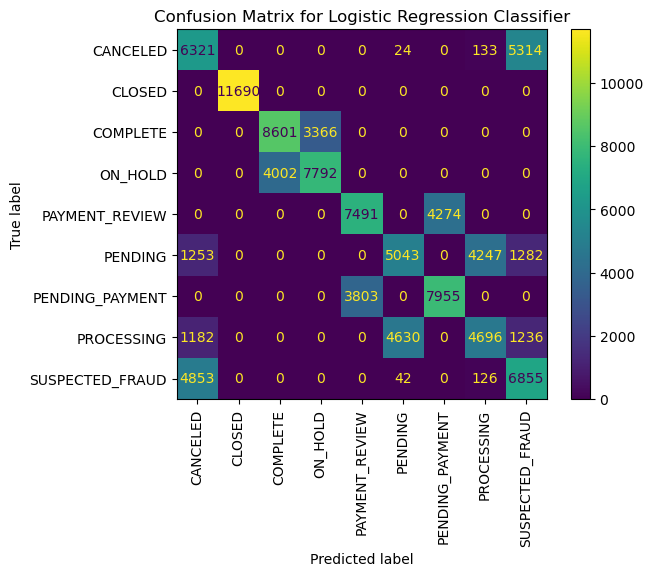

In [67]:
# Plot confusion matrix for logistic regression
plt.figure(dpi=200, figsize=(10, 15))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title("Confusion Matrix for Logistic Regression Classifier")
plt.xticks(rotation=90)
plt.show()